In [92]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [96]:
import numpy as np
import matplotlib.pyplot as plt
import kernel

t = np.linspace(0, 1, 101)
dim = len(t)
# 2. ランダムシードの固定（再現性のため）
np.random.seed(42)
n_samples = 30
use_kernel=kernel.integrated_brownian


In [97]:
mean = np.array([0] * dim)
cov = use_kernel(t)
mean_br, cov_br = kernel.bridge_kernel(t, use_kernel, y=1)

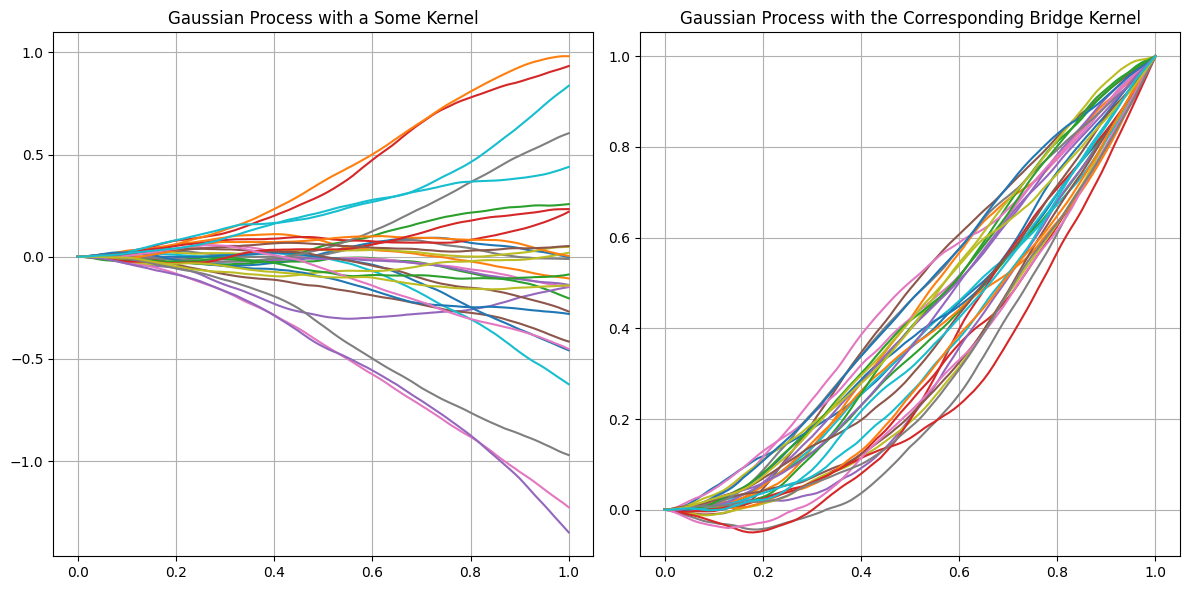

In [104]:
# 1行2列のサブプロットを作成 (figsizeで横長に設定)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# --- 1つ目のプロット (左側: axes[0]) ---
data = np.random.multivariate_normal(mean, cov, n_samples)
for ft in data:
    axes[0].plot(t, ft)
axes[0].set_title("Gaussian Process with a Some Kernel")
axes[0].grid(True)

# --- 2つ目のプロット (右側: axes[1]) ---
data = np.random.multivariate_normal(mean + mean_br, cov_br, n_samples)
for ft in data:
    axes[1].plot(t, ft)
axes[1].set_title("Gaussian Process with the Corresponding Bridge Kernel")
axes[1].grid(True)

plt.tight_layout()  # レイアウトの重なりを自動調整
plt.show()